In [61]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from ipywidgets import IntProgress, Layout
from IPython.display import display



maxtweakvariation = 10
randrange = 4000
# Bundeled Data for visualisation
XBundle = []
YBundle = []
DBundle = []

# Large Object Conditions
XPos2 = 0
YPos2 = 0
Object2Mass = 7.3476731e+22
Object2Radius = 1737400 


# Physics Constants
GravConstant =  6.67e-11

# Physics update steps per second and max simulation time

StepsPerSecond = 1 / int(input("How many seconds should pass before recalculating forces? "))
MaxSimulationTime = int(input("How long would you like the simulation to be (in seconds)? "))

prog_bar = IntProgress(min=0, max=maxtweakvariation, description = "Progress: ", layout = Layout(width="90%", height="80%") )
display(prog_bar)

#Initial starting stats
Xi = 0
Yi = 1737401
XViBase = 0
YViBase = 0

choosingtarget = True

while choosingtarget == True:
    
    DesiredX = int(input("What is your desired final X position?"))
    DesiredY = int(input("What is your desired final Y position?"))
    
    if DesiredX < 1737400 and DesiredX > -1737400 and DesiredY < 1737400 and DesiredY > -1737400:
        print("Error! One of the positional values is inside the orbited body. Please pick a value above 1737400 or below -1737400 (surface height)")
    else:
        print('\033[H\033[J') 
        print("Starting!")
        break
    
#DesiredX = random.randint(-500000,500000)
#DesiredY = -(1737400 + random.randint(-300000, 0))
tweakvariation = 1
simulation_counter = 0
Pos_Storage = []
# Movement and position updates, the equations are derived from the universal gravitational equation and trigonometry.
constant_variation = True
while constant_variation == True:
    XVi = XViBase + (random.randint(-randrange, randrange))
    YVi = YViBase + (random.randint(-randrange, randrange))
    XBundle = []
    YBundle = []
    XPos1 = Xi
    YPos1 = Yi
    XVel1 = XVi
    YVel1 = YVi
    XAccel1 = 0
    YAccel1 = 0



    # Definitions before simulation
    velbundley = []
    velbundlex = []
    velbundlet = []
    timebundle = []
    dt = 1 / StepsPerSecond
    t = 0
    counter = 0

    simulating = True
    while simulating == True:
        # t is the current time, dt is the change in time that is defined by StepsPerSecond
        t = t + dt
        
        # Tracking positions and velocities of X and Y over time by storing them in lists that are equivelant to the time steps
        
        TotalVel = (XVel1 ** 2) + (YVel1 ** 2)

        XSeperation = (XPos1 - XPos2)
        YSeperation = (YPos1 - YPos2)
        Seperation = (((XSeperation ** 2) + (YSeperation ** 2)) ** 0.5)
        
        # Angle definition from x and y seperation
        Angle = math.atan2(YSeperation, XSeperation)
        XGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Seperation ** 2)) * math.cos(Angle)
        YGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Seperation ** 2)) * math.sin(Angle)

        # Updated Velocity From Acceleration
        XVel1 = XVel1 + XGravAccel1 * dt
        YVel1 = YVel1 + YGravAccel1 * dt
        # Updaated Position From Velocity
        XPos1 = XPos1 + XVel1 * dt
        YPos1 = YPos1 + YVel1 * dt
            
        
        counter = counter + 1
        if t > MaxSimulationTime:
            break
        if Seperation < Object2Radius:
            break
 
 
    DXSeperation = (XPos1 - DesiredX)
    DYSeperation = (YPos1 - DesiredY) 
    DSeperation = (((DXSeperation ** 2) + (DYSeperation ** 2)) ** 0.5) 
         
    if simulation_counter == 0 and tweakvariation == 1:
        FinalPosI = [XViBase, YViBase, DSeperation]

    if simulation_counter == 0:
        Pos_Storage.append(FinalPosI)
        
    FinalPos = [XVi, YVi, DSeperation]
    Pos_Storage.append(FinalPos)
    

    
    simulation_counter = simulation_counter + 1
    
    if simulation_counter > 200:
        prog_bar.value = tweakvariation
        print('\033[H\033[J')
        print("Tweak {} of {} Completed".format(tweakvariation, maxtweakvariation))        
        Find_Min_List = []
        for sim in Pos_Storage:
            Find_Min_List.append(sim[2])
            
        
        min_number = min(Find_Min_List)
        SavedStats = [min_number, Pos_Storage[min_index][0], Pos_Storage[min_index][1] ]
        DBundle.append(SavedStats)
        
        min_index = Find_Min_List.index(min_number)
        
        Find_Min_List.append(XViBase)
        Find_Min_List.append(YViBase)
           
        XViBase = Pos_Storage[min_index][0]
        YViBase = Pos_Storage[min_index][1] 

        simulation_counter = 0
        Pos_Storage = []

        tweakvariation = tweakvariation + 1

        randrange = round(randrange / 5)

    if tweakvariation > maxtweakvariation:
        print("")
        print("FINISHED")
        break


DBundleDataFrame = pd.DataFrame(DBundle)
DBundleDataFrame.columns = ["Final Separation from target point (m)", "Initial X Velocity", "Initial Y Velocity"]
print("Best simulations for each tweaking cycle:")
DBundleDataFrame

IntProgress(value=0, description='Progress: ', layout=Layout(height='80%', width='90%'), max=10)


Starting!

Tweak 1 of 10 Completed

Tweak 2 of 10 Completed

Tweak 3 of 10 Completed

Tweak 4 of 10 Completed

Tweak 5 of 10 Completed

Tweak 6 of 10 Completed

Tweak 7 of 10 Completed

Tweak 8 of 10 Completed

Tweak 9 of 10 Completed

Tweak 10 of 10 Completed

FINISHED
Best simulations for each tweaking cycle:


,Final Separation from target point (m),Initial X Velocity,Initial Y Velocity
0,271096.793071,-1769,-814
1,264354.574265,1888,1287
2,116812.460799,1531,1156
3,59704.068211,1731,1031
4,12942.765477,1747,1053
5,12942.765477,1738,1062
6,12942.765477,1739,1063
7,12942.765477,1739,1063
8,12942.765477,1739,1063
9,12942.765477,1739,1063


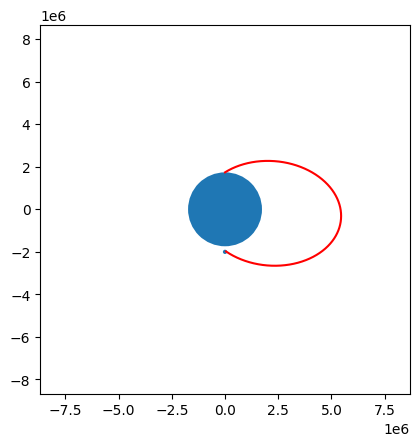

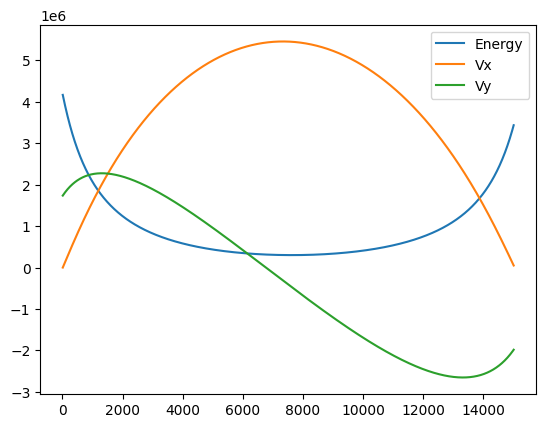

In [60]:
# Visualise best trajectory found

XBundle = []
YBundle = []

XPos1 = Xi
YPos1 = Yi
XVel1 = DBundle[maxtweakvariation - 1][1]
YVel1 = DBundle[maxtweakvariation - 1][2]
XAccel1 = 0
YAccel1 = 0



# Definitions before simulation
velbundley = []
velbundlex = []
velbundlet = []
timebundle = []
dt = 1 / StepsPerSecond
t = 0
counter = 0

simulating = True
while simulating == True:
    # t is the current time, dt is the change in time that is defined by StepsPerSecond
    t = t + dt
    
    # Tracking positions and velocities of X and Y over time by storing them in lists that are equivelant to the time steps
    XBundle.append(XPos1)
    YBundle.append(YPos1)
    velbundley.append(YVel1)
    velbundlex.append(XVel1)
    
    TotalVel = (XVel1 ** 2) + (YVel1 ** 2)
    velbundlet.append(TotalVel)
    timebundle.append(t)
    XSeperation = (XPos1 - XPos2)
    YSeperation = (YPos1 - YPos2)
    Seperation = (((XSeperation ** 2) + (YSeperation ** 2)) ** 0.5)
    
    # Angle definition from x and y seperation
    Angle = math.atan2(YSeperation, XSeperation)
    XGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Seperation ** 2)) * math.cos(Angle)
    YGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Seperation ** 2)) * math.sin(Angle)

    # Updated Velocity From Acceleration
    XVel1 = XVel1 + XGravAccel1 * dt
    YVel1 = YVel1 + YGravAccel1 * dt
    # Updaated Position From Velocity
    XPos1 = XPos1 + XVel1 * dt
    YPos1 = YPos1 + YVel1 * dt
        
    
    counter = counter + 1
    if t > MaxSimulationTime:
        break
    if Seperation < Object2Radius:
        break
    
    
myplot = (XBundle, YBundle)

figure, axes = plt.subplots() 
Drawing_colored_circle = plt.Circle(( 0 , 0 ), Object2Radius)
DesiredPoint = plt.Circle(( DesiredX, DesiredY), 100000)
axes.set_aspect(1)
axes.set_xlim(-5 * Object2Radius, 5 * Object2Radius)
axes.set_ylim(-5 * Object2Radius, 5 * Object2Radius)
axes.add_artist( Drawing_colored_circle )

axes.add_artist( DesiredPoint )

plt.plot(XBundle, YBundle, color = 'r', label = 'orbit')
plt.show()


plt.plot(timebundle, velbundlet, label = 'Energy')
plt.plot(timebundle, XBundle, label = 'Vx')
plt.plot(timebundle, YBundle, label = 'Vy')

plt.legend()    
plt.show()
    
    